In [1]:
import networkx as nx 
import dgl
import pickle

Using backend: pytorch


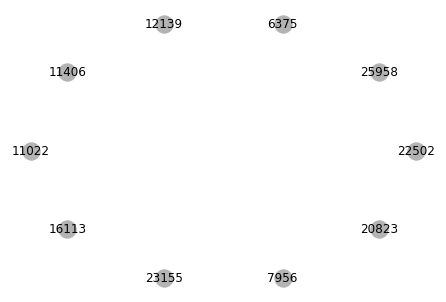

In [6]:
with open("../data/MAG_FoS/computer_science.pickle.dep.20200418.bin", "rb") as fin:
    data = pickle.load(fin)
        
name = data["name"]
g_full = data["g_full"]
vocab = data["vocab"]
test_node_ids = data["test_node_ids"]

nx_G = g_full.to_networkx().to_undirected()
temp_graph = nx_G.subgraph(test_node_ids[:10]).copy()
pos = nx.kamada_kawai_layout(temp_graph)
nx.draw(temp_graph, pos, with_labels=True, node_color=[[.7, .7, .7]])

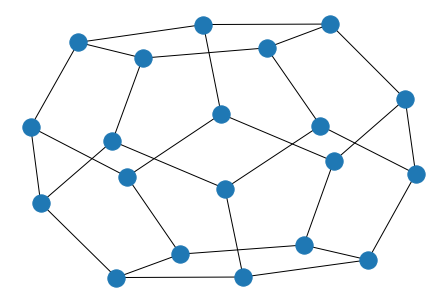

In [5]:
G = nx.dodecahedral_graph()
nx.draw(G)
# nx.draw(G, pos=nx.spring_layout(G))  # use spring layout